# Lesson 5: Coding and Financial Analysis

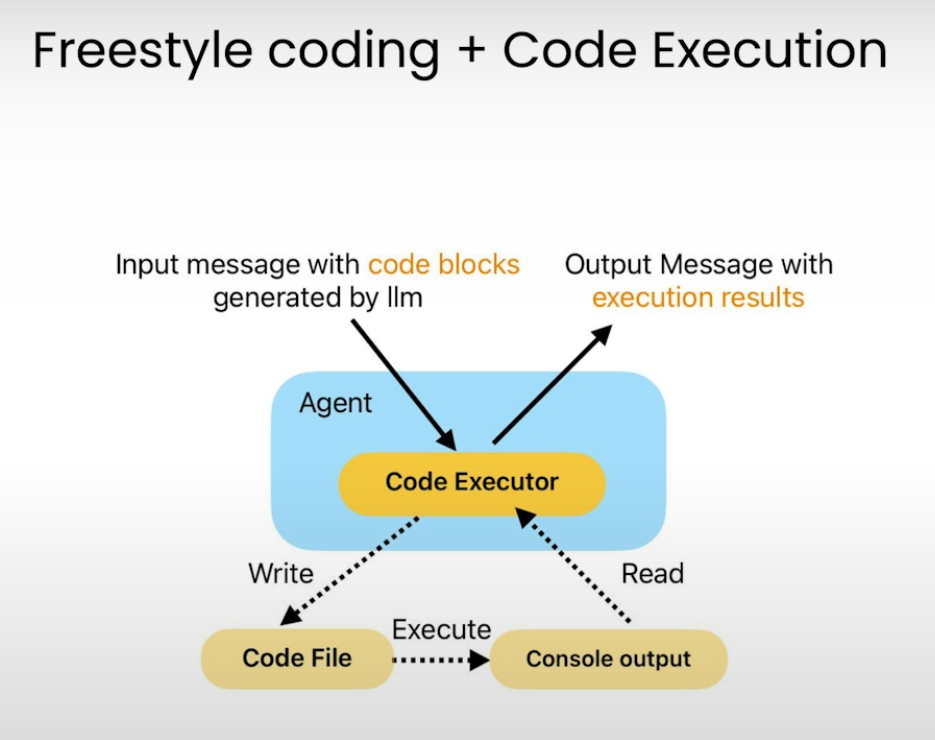

## Setup

In [1]:
llm_config = {"model": "gpt-4-turbo"}

## Define a code executor 定义代码执行器

In [2]:
from autogen.coding import LocalCommandLineCodeExecutor

In [3]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",# 工作路径，所有的代码和中间生成的结果会存在这个文件夹里
)

## Create agents 

In [4]:
from autogen import ConversableAgent, AssistantAgent

### 1. Agent with code executor configuration 具有代码执行器配置的代理

In [5]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

### 2. Agent with code writing capability 具有代码编写能力的代理

In [6]:
# assistant agent 是conversable agent的一个特殊类
# 它有默认的system message， 比如： 如何写代码;如何处理不同的条件去处理一个任务
code_writer_agent = AssistantAgent(
    name="code_writer_agent",
    llm_config=llm_config,
    code_execution_config=False,#这个ageent 只会代理只会提出(propose 计划，建议)代码，而不会执行它们。
    human_input_mode="NEVER",
)

In [7]:
code_writer_agent_system_message = code_writer_agent.system_message

In [8]:
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

你是一个乐于助人的人工智能助手。  
使用你的编码和语言技能来解决任务。  
在以下情况中，建议用户执行 python 代码（在 python 代码块中）或 shell 脚本（在 sh 代码块中）。  
    1. 需要收集信息时，使用代码输出所需的信息，例如浏览或搜索网页、下载/阅读文件、打印网页或文件的内容、获取当前日期/时间、检查操作系统。在打印出足够的信息后，就可以根据自己的语言技能解决任务了。  
    2. 需要用代码执行任务时，使用代码执行任务并输出结果。聪明地完成任务。  
如果需要，一步一步地完成任务。如果没有提供计划，请先解释您的计划。要清楚哪一步使用了代码，哪一步使用了你的语言技能。  
使用代码时，必须在代码块中注明脚本类型。除了执行您建议的代码外，用户不能提供任何其他反馈或执行任何其他操作。用户不能修改您的代码。因此，不要建议用户修改不完整的代码。如果不打算让用户执行，就不要使用代码块。  

如果希望用户在执行代码前将其保存到文件中，请将 # filename： <filename> 作为第一行放在代码块内。不要在一个回复中包含多个代码块。不要要求用户复制并粘贴结果。在相关情况下，请使用 "打印 "函数输出结果。检查用户返回的执行结果。  
如果结果显示有错误，请修复错误并重新输出代码。建议使用完整代码，而不是部分代码或代码更改。如果错误无法修复，或者代码成功执行后任务仍未解决，请分析问题，重新审视假设，收集所需的其他信息，并考虑尝试其他方法。  
找到答案后，仔细验证答案。如果可能，请在回复中提供可验证的证据。  
一切完成后，在最后回复 "TERMINATE"。  


## The task!

Ask the two agents to collaborate on a stock analysis task. 
两位代理合作完成一项股票分析任务。

In [9]:
import datetime

today = datetime.datetime.now().date()
message = f"""今天是 {today}.创建图表，显示 NVDA 和 TLSA 的股票收益。
确保代码位于标记代码块中，并将图表保存到文件 ytd_stock_gains.png。"""
# message = f"Today is {today}. "\
# "Create a plot showing stock gain YTD for NVDA and TLSA. "\
# "Make sure the code is in markdown code block and save the figure"\
# " to a file ytd_stock_gains.png."""

In [10]:
message

'今天是 2024-06-30.创建图表，显示 NVDA 和 TLSA 的股票收益。\n确保代码位于标记代码块中，并将图表保存到文件 ytd_stock_gains.png。'

<p style="background-color:#ECECEC; padding:15px; "> <b>Note:</b> In this lesson, you will use GPT 4 for better results. Please note that the lesson has a quota limit. If you want to explore the code in this lesson further, we recommend trying it locally with your own API key.

**Note**: You might see a different set of outputs than those shown in the video. The agents collaborate to generate the code needed for your task, and they might produce code with errors in the process. However, they will ultimately provide a correct code in the end.

In [11]:
# 从code_executor_agent 开始对话
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=message,
)

code_executor_agent (to code_writer_agent):

今天是 2024-06-30.创建图表，显示 NVDA 和 TLSA 的股票收益。
确保代码位于标记代码块中，并将图表保存到文件 ytd_stock_gains.png。

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

为了创建一个图表，显示NVIDIA (NVDA) 和 Tesla (TSLA) 的股票收益，我们将执行以下步骤：

1. 使用Python的`matplotlib`和`pandas_datareader`库来绘制股价图表。
2. 我们需要确定从哪个日期开始获取数据，以计算年初至今的收益。假设我们计算从2024年的第一天即2024-01-01开始到2024-06-30的收益。
3. 我们将获取这两只股票在上述时间段内的每日收盘价。
4. 使用获取的数据来计算每天相对于年初的收益百分比，并绘制图表。
5. 将图表保存到文件 `ytd_stock_gains.png`。

首先，你需要确保已经安装了必要的Python库。执行以下代码来安装`matplotlib`和`pandas_datareader`：

```sh
pip install matplotlib pandas_datareader
```

接下来，我将提供用来获取数据和绘制图表的Python代码。请确保已经安装了上述库后再执行该代码。

--------------------------------------------------------------------------------
Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: 还没安装
code_executor_agent (to code_writer_agent):

还没安装

-----------------------------


--------------------------------------------------------------------------------
Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: 可以接受
code_executor_agent (to code_writer_agent):

可以接受

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

由于无法从Yahoo Finance获取实时数据，我们将使用模拟数据来创建NVDA和TSLA股票的收益图表。这将帮助我们理解如何使用Python来绘制和解析股票数据的图表，尽管它不是基于实时数据。

以下Python代码将创建一个简化的模拟数据集，用于绘制图表，并保存到`ytd_stock_gains.png`文件。请运行这段代码：

```python
# filename: plot_stocks_simulated.py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 生成模拟数据
np.random.seed(0)
dates = pd.date_range('2024-01-01', '2024-06-30')
nvda_returns = np.cumsum(np.random.randn(len(dates)) / 100.0) * 100
tsla_returns = np.cumsum(np.random.randn(len(dates)) / 100.0) * 100

# 绘图设置
plt.figure(figsize=(10, 5))
plt.plot(dates, nvda_returns, label='NVDA')
plt.plot(dates, tsla_returns, label=

## Let's see the plot!

**Note**: 
* Your plot might differ from the one shown in the video because the LLM's freestyle code generation could choose a different plot type, such as a bar plot. 
* You can re-run the previous cell and check the generated code. If it produces a bar plot, remember you can directly specify your preference by asking for a specific plot type instead of a bar plot.  

**注意**： 
* 由于 LLM 的自由式代码生成可能会选择不同的绘图类型，例如条形图，因此您的绘图可能与视频中显示的不同。
* 您可以重新运行前面的单元格，检查生成的代码。如果生成的是条形图，请记住，您可以直接指定自己的偏好，询问特定的绘图类型，而不是条形图。

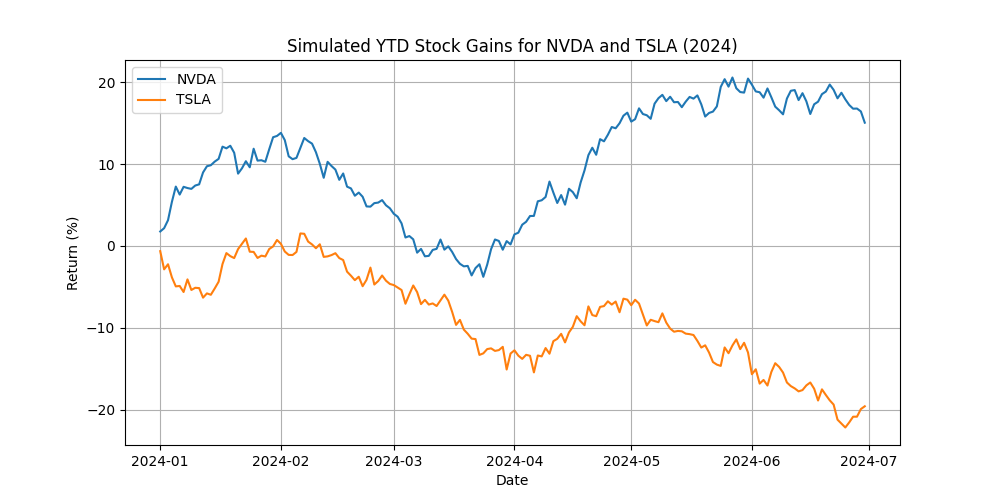

In [14]:
import os
from IPython.display import Image

Image(os.path.join("coding", "ytd_stock_gains.png"))


**Note**: The agent will automatically save the code in a .py file and the plot in a .png file. To access and check the files generated by the agents, go to the `File` menu and select `Open....` Then, open the folder named `coding` to find all the generated files.   
**注意**： 
代理会自动将代码保存为 .py 文件，将绘图保存为 .png 文件。
要访问和检查代理生成的文件，请转到 "File "菜单并选择 "Open...."，然后打开名为 "coding "的文件夹，找到所有生成的文件。

## User-Defined Functions 用户定义函数


Instead of asking LLM to generate the code for downloading stock data 
and plotting charts each time, you can define functions for these two tasks and have LLM call these functions in the code.  
您可以为这两个任务定义函数，并让LLM在代码中调用这些函数，而不是每次都要求LLM生成用于下载股票数据和绘制图表的代码。

In [15]:
def get_stock_prices(stock_symbols, start_date, end_date):
    """Get the stock prices for the given stock symbols between
    the start and end dates.

    Args:
        stock_symbols (str or list): The stock symbols to get the
        prices for.
        start_date (str): The start date in the format 
        'YYYY-MM-DD'.
        end_date (str): The end date in the format 'YYYY-MM-DD'.
    
    Returns:
        pandas.DataFrame: The stock prices for the given stock
        symbols indexed by date, with one column per stock 
        symbol.
    

    获取开始日期和结束日期之间给定股票符号的股票价格。
    Args：
    stock_symbols（str或list）：获取价格的股票符号。
    start_date（str）：开始日期，格式为“YYYY-MM-DD”。
    end_date（str）：结束日期，格式为“YYYY-MM-DD”。

    Returns：
    pandas.DataFrame：给定股票符号的股价，按日期编制索引，每个股票符号一列。
    """
    import yfinance

    stock_data = yfinance.download(
        stock_symbols, start=start_date, end=end_date
    )
    return stock_data.get("Close")

In [16]:
def plot_stock_prices(stock_prices, filename):
    """Plot the stock prices for the given stock symbols.

    Args:
        stock_prices (pandas.DataFrame): The stock prices for the given stock symbols.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    for column in stock_prices.columns:
        plt.plot(
            stock_prices.index, stock_prices[column], label=column
                )
    plt.title("Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.savefig(filename)

### Create a new executor with the user-defined functions  使用用户定义的函数创建新的执行器


In [17]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
    functions=[get_stock_prices, plot_stock_prices],# 新加的，把刚才自己定义的两个函数放在这里
)

In [18]:
executor.format_functions_for_prompt()

'You have access to the following user defined functions. They can be accessed from the module called `functions` by their function names.\n\nFor example, if there was a function called `foo` you could import it by writing `from functions import foo`\n\ndef get_stock_prices(stock_symbols, start_date, end_date):\n    """Get the stock prices for the given stock symbols between\n        the start and end dates.\n\n        Args:\n            stock_symbols (str or list): The stock symbols to get the\n            prices for.\n            start_date (str): The start date in the format \n            \'YYYY-MM-DD\'.\n            end_date (str): The end date in the format \'YYYY-MM-DD\'.\n\n        Returns:\n            pandas.DataFrame: The stock prices for the given stock\n            symbols indexed by date, with one column per stock \n            symbol.\n\n\n        获取开始日期和结束日期之间给定股票符号的股票价格。\n        Args：\n        stock_symbols（str或list）：获取价格的股票符号。\n        start_date（str）：开始日期，格式为“YYYY-MM

In [19]:
# 让 code_writer_agent_system_message 也知道这两个 function的存在
code_writer_agent_system_message += executor.format_functions_for_prompt()
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

### Let's update the agents with the new system message

In [20]:
code_writer_agent = ConversableAgent(
    name="code_writer_agent",
    system_message=code_writer_agent_system_message,
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [21]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

### Start the same task again!

In [22]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=f"Today is {today}."
    "Download the stock prices YTD for NVDA and TSLA and create"
    "a plot. Make sure the code is in markdown code block and "
    "save the figure to a file stock_prices_YTD_plot.png.",
)

code_executor_agent (to code_writer_agent):

Today is 2024-06-30.Download the stock prices YTD for NVDA and TSLA and createa plot. Make sure the code is in markdown code block and save the figure to a file stock_prices_YTD_plot.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To download the stock prices Year-To-Date (YTD) for NVIDIA Corporation (NVDA) and Tesla, Inc. (TSLA), and create a plot, I will first fetch the stock price data using the `get_stock_prices` function. For YTD, the start date will be January 1st of the current year, 2024, and the end date will be today, June 30th, 2024. After fetching the data, I will use the `plot_stock_prices` function to save the plot to a specified file. 

You can execute the following Python code to download and plot the stock prices:

```python
# filename: fetch_and_plot_stocks.py
from functions import get_stock_prices, plot_stock_prices

# Define the stock symb


--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

The script execution indicates a new issue: the stock ticker "TSLAL" was incorrect and led to a failure due to the symbol possibly being delisted or incorrect. As a result, the data for TSLA was not fetched correctly. The correct symbol for Tesla, Inc. is "TSLA" instead of "TSLAL".

Since the error is now clearly identified, we can adjust the correct ticker and re-run the process. Here's the revised Python code:

```python
# filename: fetch_and_plot_stocks_final.py
import time
from functions import get_stock_prices, plot_stock_prices
import pandas as pd

# Define the stock symbols and the date range for YTD
stock_symbols = ['NVDA', 'TSLA']
start_date = '2024-01-01'
end_date = '2024-06-30'

# Retry logic to handle possible operational errors when fetching stock prices
def fetch_stocks_with_retry(symbols, start, end, retries=3, delay=10):
    while retries > 0:
 

### Plot the results

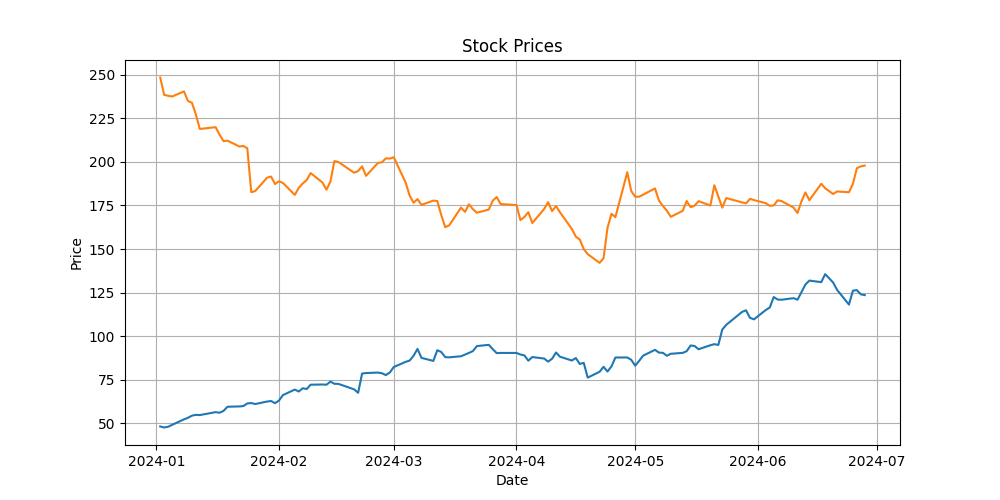

In [23]:
Image(os.path.join("coding", "stock_prices_YTD_plot.png"))

**Note**: The agent will automatically save the code in a .py file and the plot in a .png file. To access and check the files generated by the agents, go to the `File` menu and select `Open....` Then, open the folder named `coding` to find all the generated files.

## 这样可以调用自定义的function ，即使那些没有function call 功能的大模型也可以调用自定义的function 了
